<a href="https://colab.research.google.com/github/InbalBolshinsky/DL_finalProject/blob/main/Lungn_Cancer_project_DL_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub
import kagglehub

# Download dataset (default behavior)
path = kagglehub.dataset_download("adityamahimkar/iqothnccd-lung-cancer-dataset")

print("Dataset downloaded to:", path)


100%|██████████| 199M/199M [00:03<00:00, 53.9MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Copy dataset from default location to Google Drive
!cp -r /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset /content/drive/MyDrive/KaggleDatasets/LungCancer


Mounted at /content/drive
cp: cannot create directory '/content/drive/MyDrive/KaggleDatasets/LungCancer': No such file or directory


In [3]:
import os

base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
print("Base path:", base_path)
patients = os.listdir(base_path)
patients.sort()

Base path: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/


In [4]:
import os
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
print("Contents of base_path:")
print(os.listdir(base_path))


Contents of base_path:
['Normal cases', 'IQ-OTH_NCCD lung cancer dataset.txt', 'Malignant cases', 'Bengin cases']


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install pydicom
import pydicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline
!pip install dicom
import dicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 kB 12.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [6]:
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

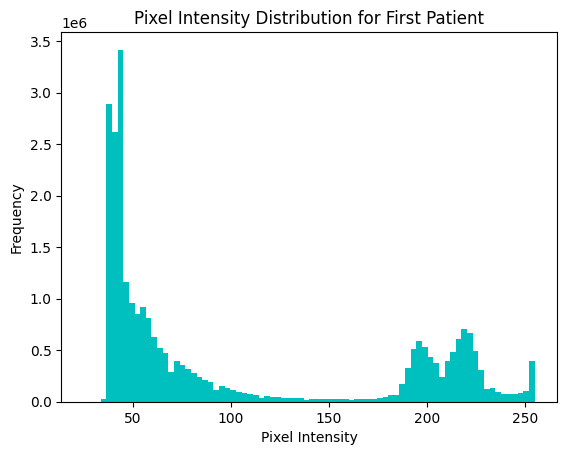

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Base path to the dataset
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
categories = os.listdir(base_path)

# Function to load and resize images
def load_images(path, target_size=(256, 256)):
    image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith((".jpg", ".png", ".jpeg"))]
    images = []
    for file in image_files:
        img = Image.open(file).convert("L")  # Convert to grayscale
        img_resized = img.resize(target_size)  # Resize to target dimensions
        images.append(np.array(img_resized))
    return np.stack(images)  # Combine all images into a 3D array

# Find the first patient folder
first_patient_images = None
for category in categories:
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):  # Ensure it's a folder
        patients = os.listdir(category_path)
        patients.sort()
        if patients:
            first_patient_path = os.path.join(category_path, patients[0])
            if os.path.isdir(first_patient_path):
                first_patient_images = load_images(first_patient_path, target_size=(256, 256))
            else:
                # If images are directly in the category folder
                first_patient_images = load_images(category_path, target_size=(256, 256))
            break

# Check if images were loaded
if first_patient_images is not None:
    # Flatten and plot the histogram
    plt.hist(first_patient_images.flatten(), bins=80, color='c')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title("Pixel Intensity Distribution for First Patient")
    plt.show()
else:
    print("No images found in the dataset.")



Loading from category: Normal cases
Selected file: Normal case (100).jpg


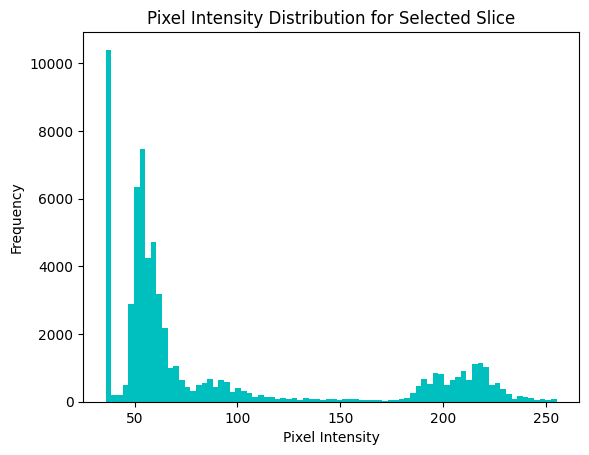

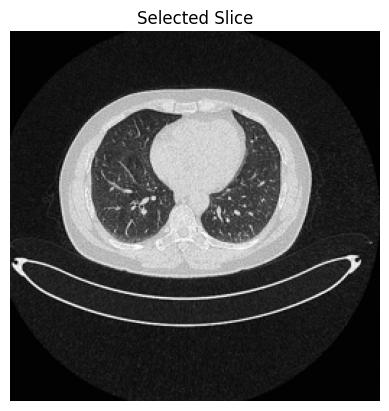

In [8]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to load image slices from a given folder
def load_scan(path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(path) if f.lower().endswith((".jpg", ".png", ".jpeg")) and f != ".DS_Store"]
    image_files.sort()  # Ensure consistent ordering
    slices = []
    for file in image_files:
        img = Image.open(os.path.join(path, file)).convert("L")  # Convert to grayscale
        img_resized = img.resize(target_size)  # Resize to target size
        slices.append(np.array(img_resized))  # Append as numpy array
    return np.stack(slices)  # Combine into a 3D array

# Base path to the dataset
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
categories = os.listdir(base_path)

# Select the first category (e.g., 'Malignant cases')
category_path = os.path.join(base_path, categories[0])  # Adjust category index if needed
print(f"Loading from category: {categories[0]}")

# Load all images from the category folder
image_files = [f for f in os.listdir(category_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
image_files.sort()

# Simulate loading the "third patient" by selecting a subset of images
# Here, we treat a single image as "a patient's slice" for simplicity
third_patient_path = os.path.join(category_path, image_files[2])  # Adjust index as needed
print(f"Selected file: {image_files[2]}")

# Load the selected image as a single slice
img = Image.open(third_patient_path).convert("L")
img_resized = img.resize((256, 256))  # Resize to ensure consistency
first_patient_pixels = np.array(img_resized)

# Plot histogram of pixel intensities
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution for Selected Slice")
plt.show()

# Show the selected slice
plt.imshow(first_patient_pixels, cmap=plt.cm.gray)
plt.axis('off')  # Remove axes
plt.title("Selected Slice")
plt.show()


In [9]:
import os
from PIL import Image
import numpy as np
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import scipy.ndimage

# Function to resample the image
def resample(image, original_spacing, new_spacing=[1, 1, 1]):
    """
    Resamples the 3D image to the desired spacing.

    Parameters:
        image (ndarray): 3D NumPy array representing the image stack.
        original_spacing (list): Original spacing in z, y, x dimensions.
        new_spacing (list): Desired spacing in z, y, x dimensions.

    Returns:
        resampled_image (ndarray): Resampled 3D image.
        new_spacing (list): Adjusted spacing.
    """
    resize_factor = np.array(original_spacing) / np.array(new_spacing)
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape).astype(int)
    real_resize_factor = new_shape / image.shape
    new_spacing = np.array(original_spacing) / real_resize_factor

    resampled_image = scipy.ndimage.zoom(image, real_resize_factor, mode='nearest')
    return resampled_image, new_spacing

# Function to plot a 3D representation of the image
def plot_3d(image, threshold=50):
    """
    Visualizes a 3D representation of the image using a specified threshold.

    Parameters:
        image (ndarray): 3D NumPy array of the resampled image.
        threshold (int): Intensity threshold for rendering (default: 50).
    """
    # Transpose the image so it is upright
    p = image.transpose(2, 1, 0)

    # Extract the 3D surface using the marching cubes algorithm
    verts, faces, _, _ = measure.marching_cubes(p, level=threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Create a 3D mesh
    mesh = Poly3DCollection(verts[faces], alpha=0.7)
    face_color = [0.45, 0.45, 0.75]  # Blueish
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()




In [10]:
# Base path to the dataset
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
categories = os.listdir(base_path)

# Select a category (e.g., Malignant cases) and load images
category_path = os.path.join(base_path, categories[0])
image_files = [f for f in os.listdir(category_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
image_files.sort()

# Load all images into a 3D NumPy array with resizing
target_size = (256, 256)  # Define the target size for all slices
image_stack = []
for file in image_files:
    img = Image.open(os.path.join(category_path, file)).convert("L")
    img_resized = img.resize(target_size)  # Resize to ensure consistent dimensions
    image_stack.append(np.array(img_resized))

image_stack = np.stack(image_stack)  # Convert to a 3D NumPy array

# Original spacing (set arbitrary values since we don't have DICOM spacing)
original_spacing = [1, 1, 1]  # Replace with actual spacing if known
new_spacing = [1, 1, 1]  # Desired spacing

# Resample the 3D image
pix_resampled, spacing = resample(image_stack, original_spacing, new_spacing)

# Print resampled image shape
print("Shape before resampling:", image_stack.shape)
print("Shape after resampling:", pix_resampled.shape)

Shape before resampling: (416, 256, 256)
Shape after resampling: (416, 256, 256)


In [11]:
print(f"Minimum intensity: {pix_resampled.min()}")
print(f"Maximum intensity: {pix_resampled.max()}")


Minimum intensity: 25
Maximum intensity: 255


Minimum intensity: 25
Maximum intensity: 255


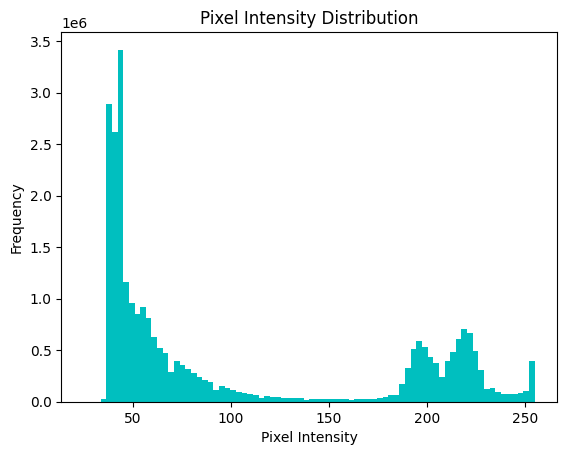

In [ ]:
# Check the intensity range
min_intensity = pix_resampled.min()
max_intensity = pix_resampled.max()
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")

# Plot histogram to understand intensity distribution
plt.hist(pix_resampled.flatten(), bins=80, color='c')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

# Choose a valid threshold based on the histogram and intensity range
threshold = 150  # Start with a reasonable value and adjust as needed
if threshold < min_intensity or threshold > max_intensity:
    raise ValueError(f"Threshold {threshold} is out of range ({min_intensity}, {max_intensity}).")

# Attempt to plot the 3D visualization
try:
    plot_3d(pix_resampled, threshold=threshold)
except RuntimeError as e:
    print(f"RuntimeError: {e}")
    print("Try lowering the threshold to include more voxels.")
